In [1]:
import os

from PIL import Image
import torch
import pickle
from torch.utils.data.dataloader import DataLoader

from transform import mask_image_train_transform, mask_image_test_transform

from model import MaskDetectionModel
from dataset import MaskImageDataset
from utils import calc_accuracy

data_path = './data'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = MaskImageDataset(os.path.join(data_path, 'train'), transform=mask_image_train_transform)
train_loader = DataLoader(train_dataset, batch_size=42, shuffle=True)
train_size = len(train_dataset)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MaskDetectionModel()
model.load_state_dict(torch.load('model.state', map_location=device))

<All keys matched successfully>

In [2]:
with open('frame.pkl', 'rb') as pkl:
    frame = pickle.load(pkl)

In [3]:
frame.shape

(239, 239, 3)

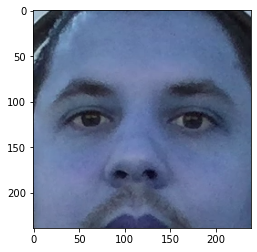

In [4]:
from matplotlib.pyplot import imshow

imshow(frame)

In [5]:
t = mask_image_test_transform(Image.fromarray(frame)).reshape(1,1,128,128)

predicted = int(torch.softmax(model(t), dim=1).argmax(dim=1))
predicted

torch.Size([1, 1, 128, 128])
torch.Size([1, 32, 64, 64])
torch.Size([1, 64, 32, 32])
torch.Size([1, 65536])
torch.Size([1, 2])


0

In [28]:
float(torch.softmax(model(t), dim=1)[:,1])

0.0